
# Module 4 (DATA SCIENCE CAPSTONE)
# Project 1
# HEALTH CARE
## Student Name : Shivam Uppal

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("health care diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum() # as of now there is no missing values in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# Histograms

In [8]:
def plots (column):
    fig, ax = plt.subplots(nrows=1, ncols=len(column), figsize=(15,4))
    for i, col in enumerate(column):
        sns.distplot(x=df[col], ax=ax[i],)

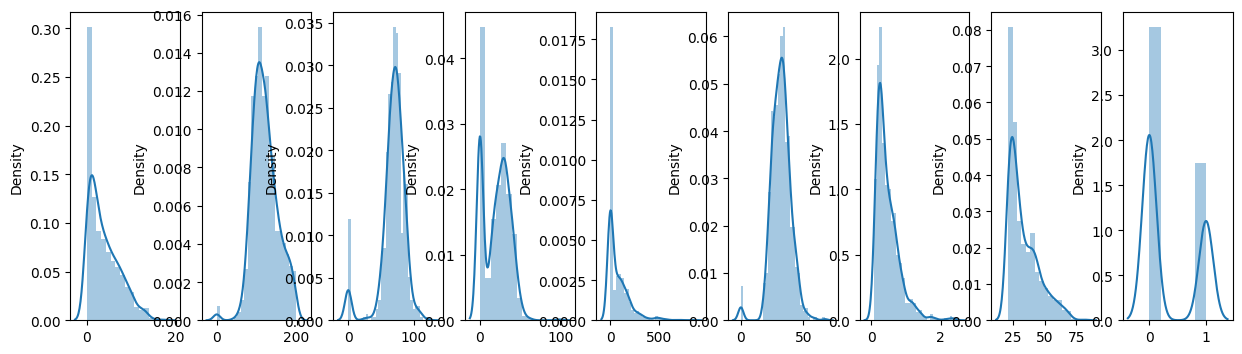

In [9]:
plots(df.columns)

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Glucose, BP, Skinthickness, Insulin and Bmi is having Zeros

In [11]:
for col in df.columns:
    print(col, "is having", df[df[col]==0].count()[0], "Zeros")

Pregnancies is having 111 Zeros
Glucose is having 5 Zeros
BloodPressure is having 35 Zeros
SkinThickness is having 227 Zeros
Insulin is having 374 Zeros
BMI is having 11 Zeros
DiabetesPedigreeFunction is having 0 Zeros
Age is having 0 Zeros
Outcome is having 500 Zeros


- Pregnencies Can be Zero, but Glucose, BP, SkinThickness, BMI Cannt be Zero.
- insulin can be zero but only when the perosn is not diabetic. lets check its relationship

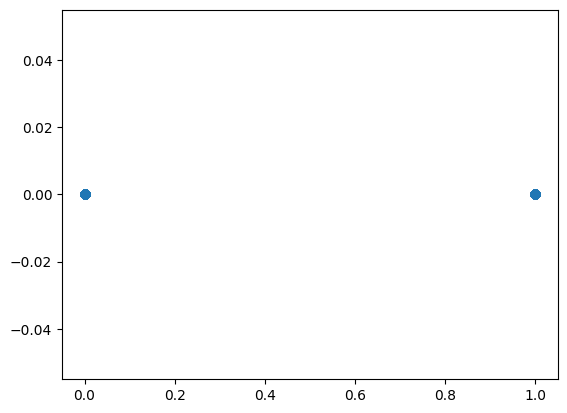

In [12]:
plt.scatter(df[df["Insulin"]==0]["Outcome"], df[df["Insulin"]==0]["Insulin"])

- zero level of insulin lying in both classes, so we'll considers these zeros as missing values

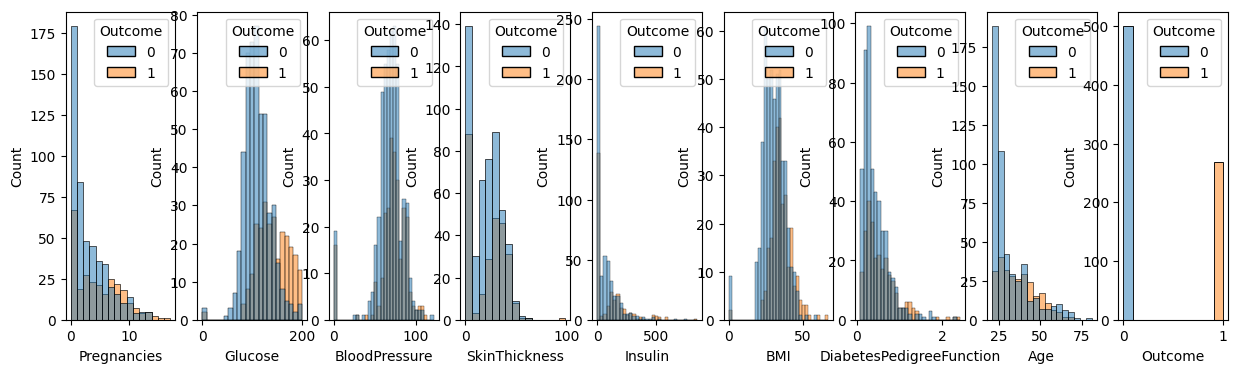

In [13]:
def histplots (column):
    fig, ax = plt.subplots(nrows=1, ncols=len(column), figsize=(15,4))
    for i, col in enumerate(column):
        sns.histplot(x=df[col], ax=ax[i], hue=df.Outcome)

histplots(df.columns)

In [14]:
columns = ["BloodPressure", "SkinThickness", "BMI", "Glucose", "Insulin"] # Having Missing Values
for feature in columns:
       df[feature].replace(0, df[feature].median(), inplace=True)

In [15]:
# Outliers
def outliers (column):
    fig, ax = plt.subplots(nrows=1, ncols=len(column), figsize=(15,4))
    for i, col in enumerate(column):
        sns.boxplot(x=df[col], ax=ax[i],)

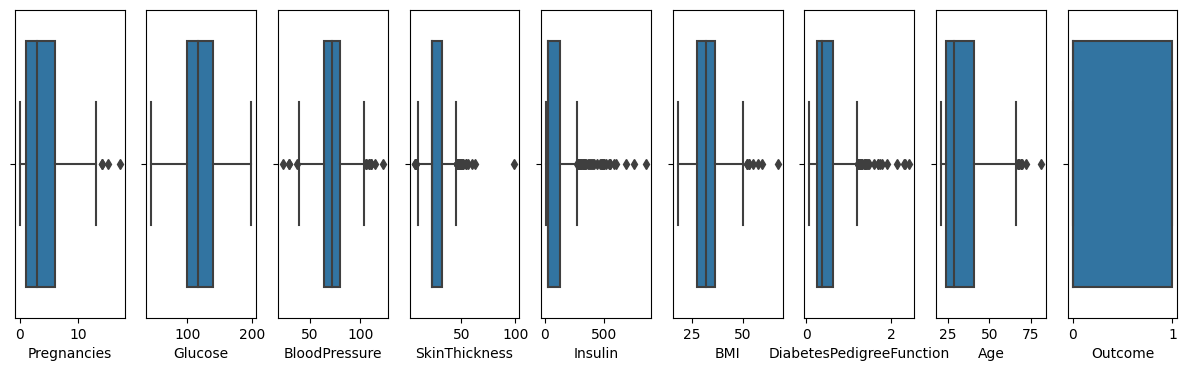

In [16]:
outliers(df.columns)

In [17]:
# Before removing outliers , we have to check weather these affects our target variables or not

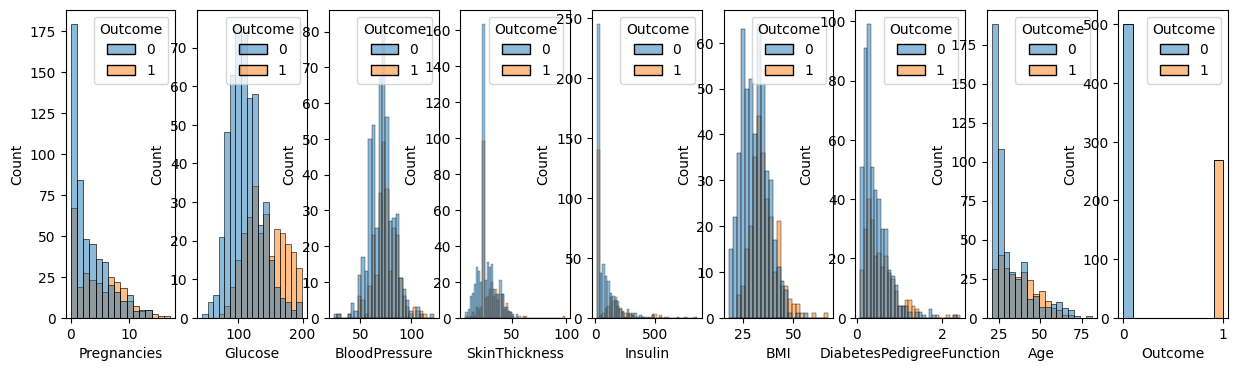

In [18]:
def histplots (column):
    fig, ax = plt.subplots(nrows=1, ncols=len(column), figsize=(15,4))
    for i, col in enumerate(column):
        sns.histplot(x=df[col], ax=ax[i], hue=df.Outcome)

histplots(df.columns)

Some of the major outliers in BMi belongs to a particular class but they are very few. we can assume that its because of the randomenss.
as we have less data points, we are not removing the outliers instead we,ll cap them

In [19]:
def capping(column):
    for feature in column:
        Q1 = np.quantile(df[feature], 0.25)
        Q3=np.quantile(df[feature], 0.75)
        IQR = Q3-Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        df[feature]=np.where(df[feature]>upper_bound, upper_bound, np.where(df[feature]<lower_bound, lower_bound, df[feature]))

In [20]:
capping(df.columns)

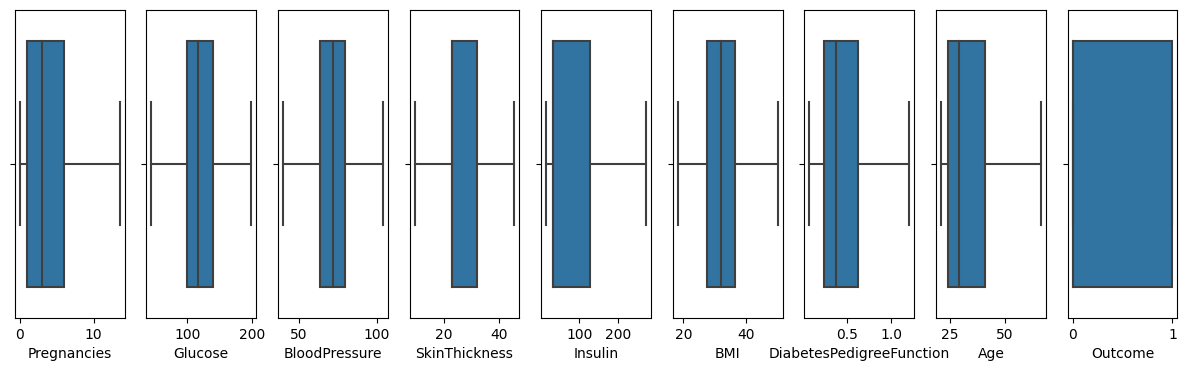

In [21]:
outliers(df.columns)

In [22]:
df.to_csv("Health_Care_Cleaned.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


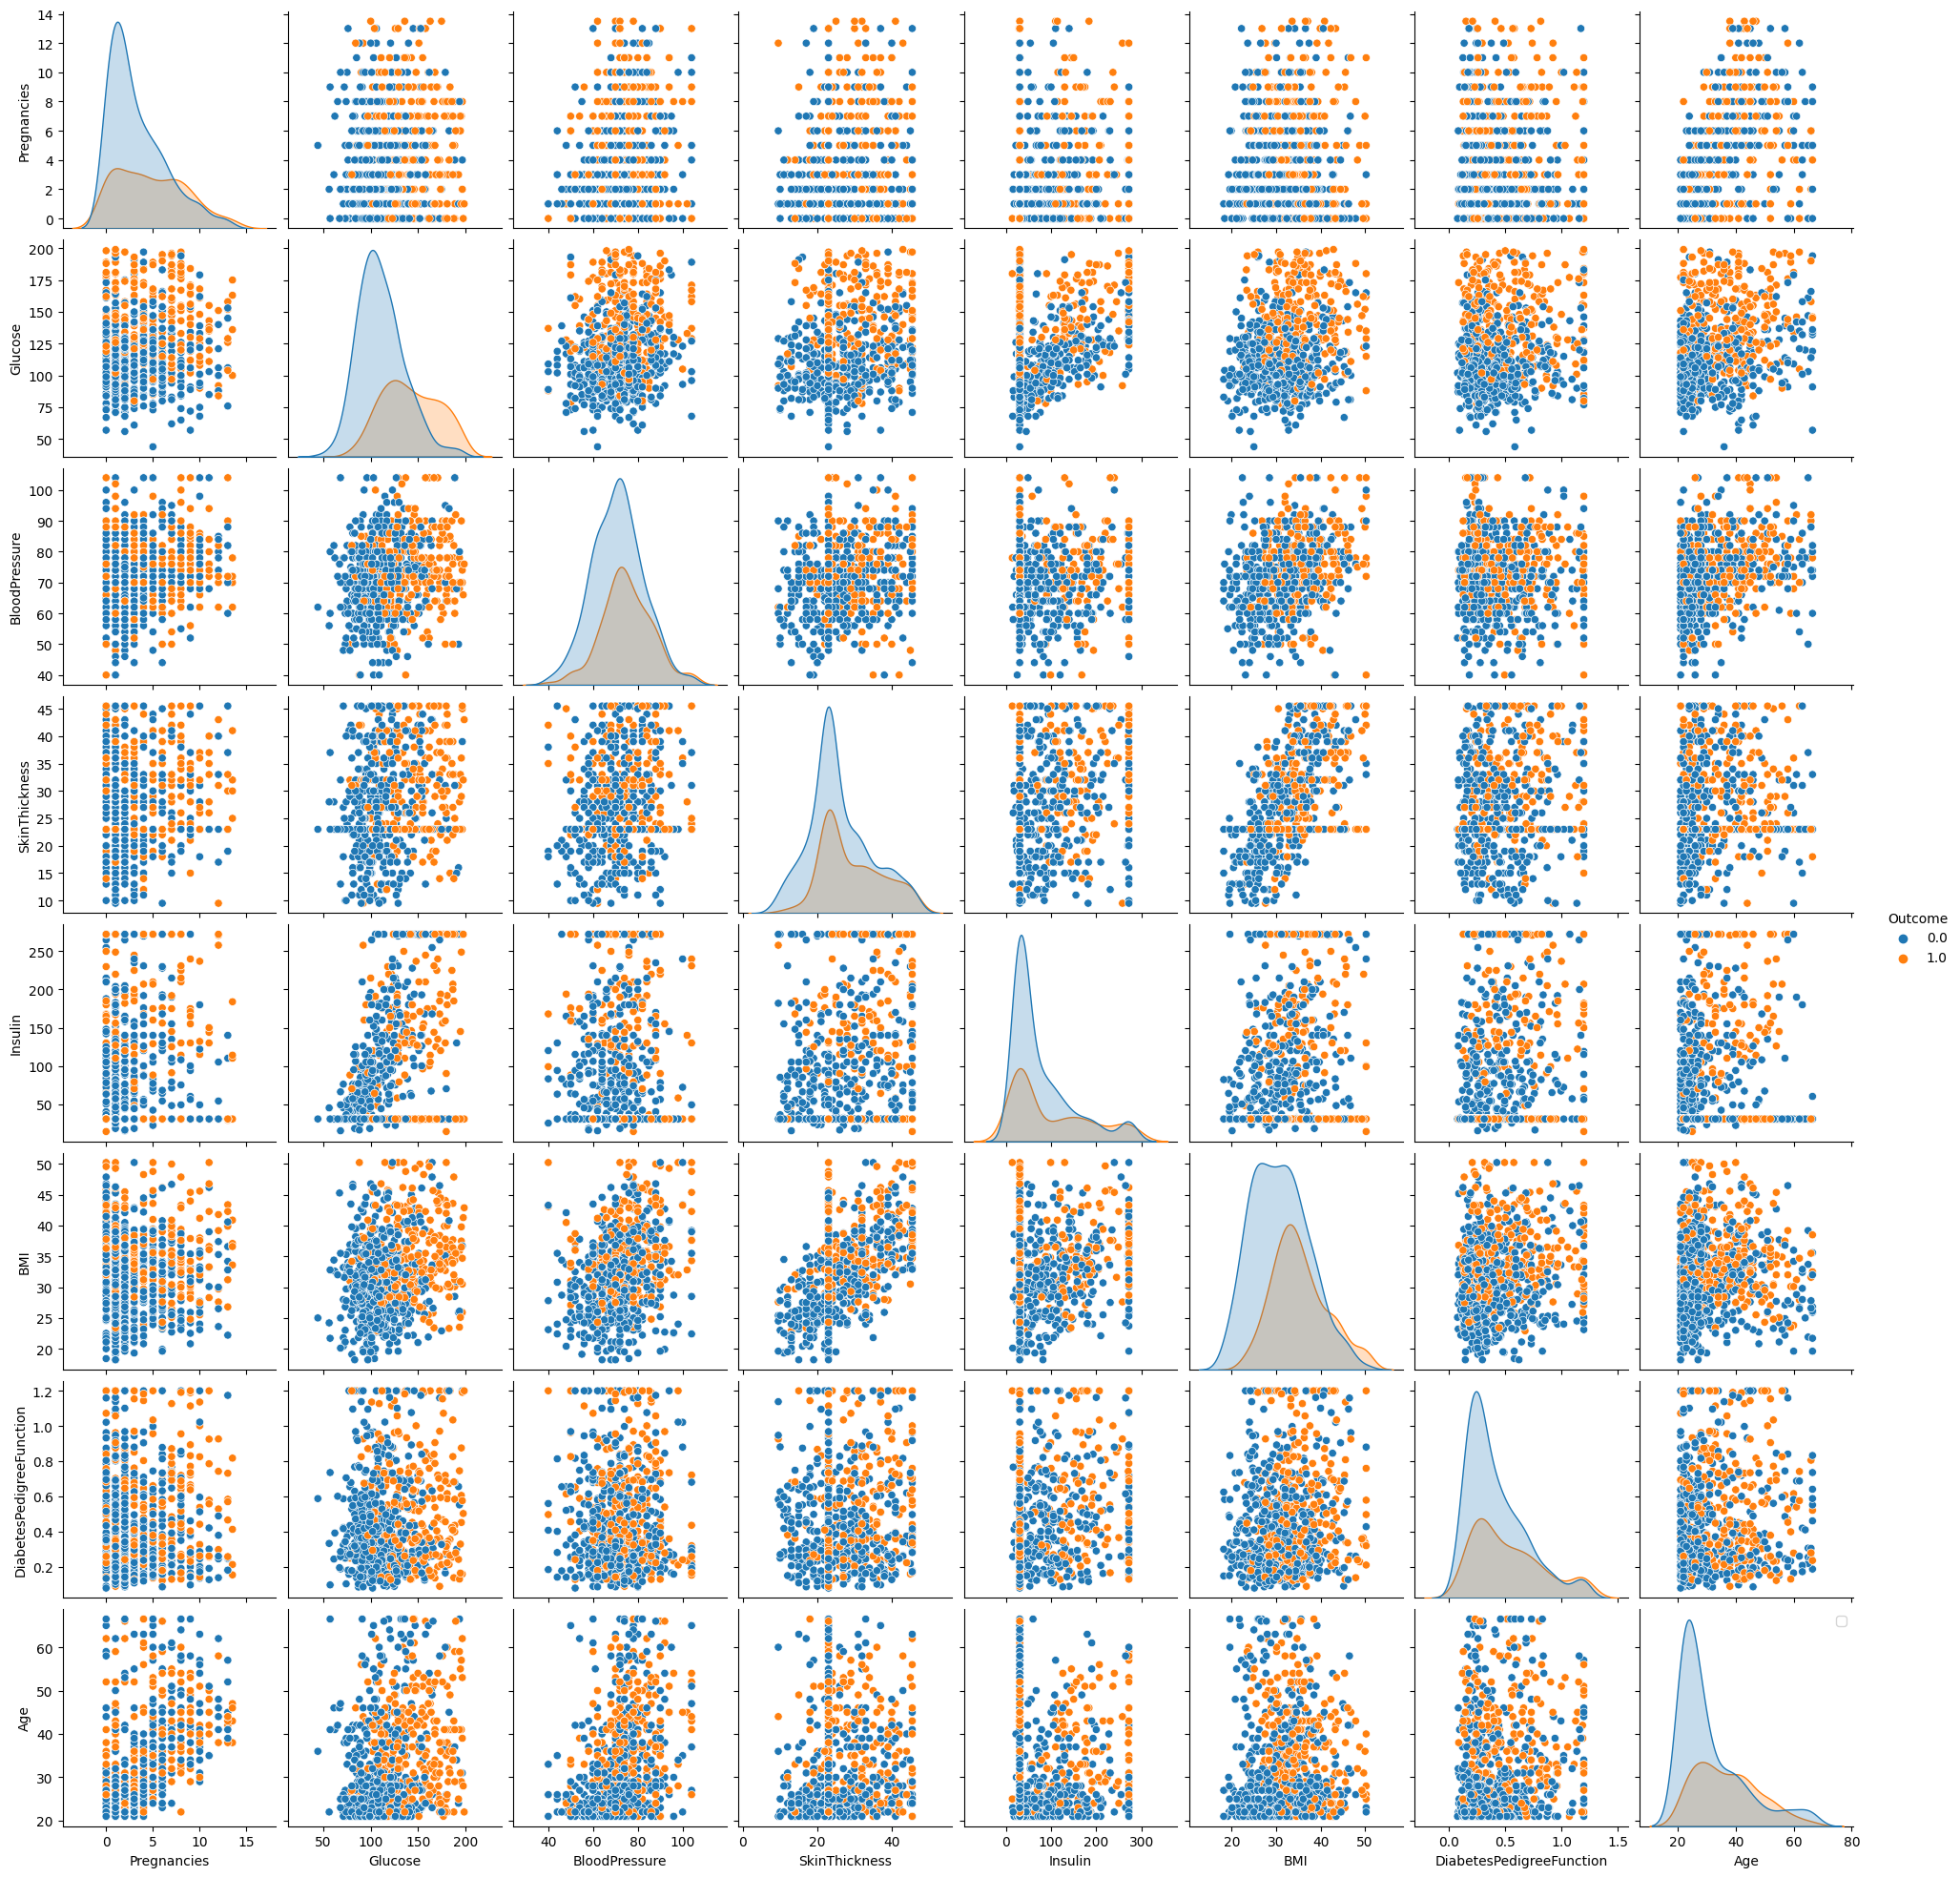

In [23]:
sns.pairplot(df, hue="Outcome")
plt.legend()

<AxesSubplot: >

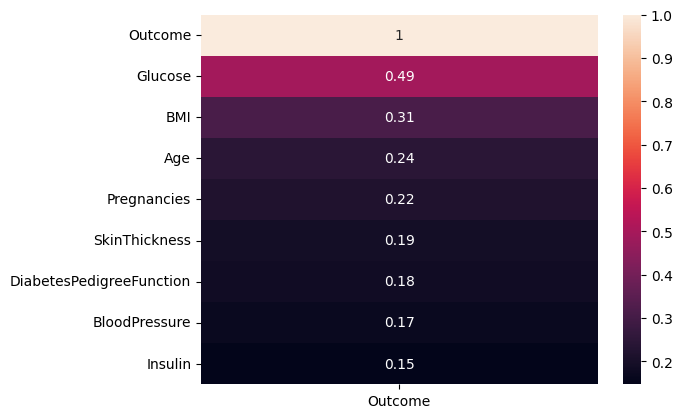

In [24]:
corr=df.corr()
corr=corr["Outcome"]
corr=corr.sort_values(ascending=False)
sns.heatmap(corr.to_frame(), annot=True)

- Glucose, this is the most strognly positive correlated with the outcome among all the features. this feature could be significant indicator.
- BMI is also positive correlated, is is also an important feature
- Pregnencies also show the slightly positive correlated, means more pregnencies may cause diabetes.
- Age is also slightly correlated, this shows older peoples may be more likely to have diabities
- Skinthickness, Blood Pressure and Isulin is haveing very weak correlation, these may not be a significant feature.
- Diabetes Pedigree Function calculates diabetes likelihood depending on the subject's age and his/her diabetic family history. it is a significant feature for detenting diabetes but in this case it has very weak correlation. although it is slighlty correlated we'll still consider this feature

In [25]:
X=df.drop(columns="Outcome")
y=df.Outcome

In [26]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [113]:
y_train.value_counts()

0.0    393
1.0    221
Name: Outcome, dtype: int64

In [114]:
# Upsampling

from imblearn.combine import SMOTETomek
smote=SMOTETomek()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train) # Resampling
y_train_res.value_counts() # Counts

1.0    366
0.0    366
Name: Outcome, dtype: int64

# Sacling the data

In [115]:
scalar=MinMaxScaler() # for SVC
X_train_sc = scalar.fit_transform(X_train_res)
y_train_sc = scalar.fit_transform(np.array(y_train_res).reshape(-1,1))

# Model Logistic Regression

In [116]:
lr=LogisticRegression()
cv=KFold(n_splits=5, shuffle=True)
lr_grid=grid = {"penalty" : ['l2', 'elasticnet'],
    "C" : [0.1, 1, 10]}

In [117]:
lr_grid_search=GridSearchCV(lr, param_grid=lr_grid, cv=cv, scoring="accuracy", n_jobs=-1)

In [118]:
lr_grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2', 'elasticnet']},
             scoring='accuracy')

In [119]:
lr_grid_search.best_score_, lr_grid_search.best_params_

(0.7404249370981268, {'C': 10, 'penalty': 'l2'})

In [120]:
lr_yhat=lr_grid_search.predict(X_test)
lr_probab = lr_grid_search.predict_proba(X_test)[:,1]

In [122]:
print("Classification Report of Logistic Regression \n" ,classification_report(lr_yhat, y_test))
print("Confusion Matrix of Logistic Regression \n", confusion_matrix(lr_yhat, y_test))
print("accuracy Score :" ,accuracy_score(lr_yhat, y_test))

Classification Report of Logistic Regression 
               precision    recall  f1-score   support

         0.0       0.74      0.91      0.81        87
         1.0       0.83      0.58      0.68        67

    accuracy                           0.77       154
   macro avg       0.78      0.75      0.75       154
weighted avg       0.78      0.77      0.76       154

Confusion Matrix of Logistic Regression 
 [[79  8]
 [28 39]]
accuracy Score : 0.7662337662337663


- Model gives veru less False Negative Rate but a high False Positive Rate, even the weighted recall is 0.77.

# Random Forest Classifier

In [123]:
rf=RandomForestClassifier()
rf_grid=grid = {
    "n_estimators" : [100,200,300],
    "criterion" : ["ginni", "entropy"],
    "max_depth" : [1,2,3, None],}

In [124]:
rf_grid_search=GridSearchCV(rf, param_grid=rf_grid, cv=cv, n_jobs=-1, scoring="accuracy")

In [125]:
rf_grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': [1, 2, 3, None],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [126]:
rf_grid_search.best_score_, rf_grid_search.best_params_

(0.8361289721367999,
 {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100})

In [127]:
rf_yhat=rf_grid_search.predict(X_test)
rf_probab = rf_grid_search.predict_proba(X_test)[:,1]

In [128]:
print("Classification Report of Random Forest \n" ,classification_report(rf_yhat, y_test))
print("Confusion Matrix of Random Forest \n", confusion_matrix(rf_yhat, y_test))
print("accuracy Score :" ,accuracy_score(rf_yhat, y_test))

Classification Report of Random Forest 
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        98
         1.0       0.79      0.66      0.72        56

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154

Confusion Matrix of Random Forest 
 [[88 10]
 [19 37]]
accuracy Score : 0.8116883116883117


- Random Forest gives the better results than Logistice Regression. Model Gives highest recall & weighted recall value.

# SVC

In [129]:
svc=SVC()
svc_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': [1,2,3,4], 
               "probability" : [True]}

In [130]:
svc_grid_search = GridSearchCV(svc, param_grid=svc_grid, n_jobs=-1, scoring='accuracy', cv=cv)

In [131]:
svc_grid_search.fit(X_train_sc, y_train_sc)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [1, 2, 3, 4],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'probability': [True]},
             scoring='accuracy')

In [132]:
svc_grid_search.best_score_, svc_grid_search.best_params_

(0.8224489795918366, {'C': 100, 'degree': 1, 'gamma': 1, 'probability': True})

In [133]:
svc_yhat=svc_grid_search.predict(X_test)
svc_probab = svc_grid_search.predict_proba(X_test)[:,1]

In [134]:
print("Classification Report of SVC \n" ,classification_report(svc_yhat, y_test))
print("Confusion Matrix of SVC \n", confusion_matrix(svc_yhat, y_test))
print("accuracy Score :" ,accuracy_score(svc_yhat, y_test))

Classification Report of SVC 
               precision    recall  f1-score   support

         0.0       1.00      0.69      0.82       154
         1.0       0.00      0.00      0.00         0

    accuracy                           0.69       154
   macro avg       0.50      0.35      0.41       154
weighted avg       1.00      0.69      0.82       154

Confusion Matrix of SVC 
 [[107  47]
 [  0   0]]
accuracy Score : 0.6948051948051948


SVC is performing so bad, the model is doing False Negative Mistakes only, which reduces the recall value.

# AUC ROC CURVE

In [135]:
from sklearn.metrics import roc_curve, roc_auc_score
lr_fpr, lr_tpr, lr_tresh = roc_curve(y_test, lr_probab)
rf_fpr, rf_tpr, rf_tresh = roc_curve(y_test, rf_probab)
svc_fpr, svc_tpr, svc_tresh = roc_curve(y_test, svc_probab)



In [136]:
lr_auc_score = roc_auc_score(y_test, lr_probab)
rf_auc_score = roc_auc_score(y_test, rf_probab)
svc_auc_score = roc_auc_score(y_test, svc_probab)

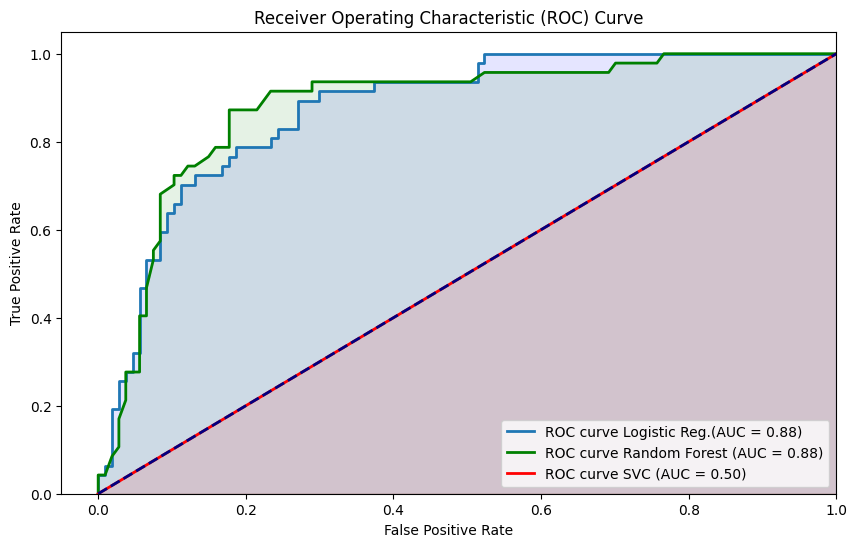

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, lw=2, label='ROC curve Logistic Reg.(AUC = %0.2f)' % lr_auc_score)
plt.plot(rf_fpr, rf_tpr, lw=2, label='ROC curve Random Forest (AUC = %0.2f)' % rf_auc_score, c="g")
plt.plot(svc_fpr, svc_tpr, lw=2, label='ROC curve SVC (AUC = %0.2f)' % svc_auc_score, c="r")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")



# shaded region
plt.fill_between(lr_fpr, lr_tpr, 0, alpha=0.1, color='b')
plt.fill_between(rf_fpr, rf_tpr, 0, alpha=0.1, color='g')
plt.fill_between(svc_fpr, svc_tpr, 0, alpha=0.1, color='r')

plt.show()

## Conclusion
- Random forest and the Logistic regresion covers the same amount of area which is 88% area under the corve.
- but, random forest isthe better classifier than Logistic Reg. cz it has higest weighted recall value. 